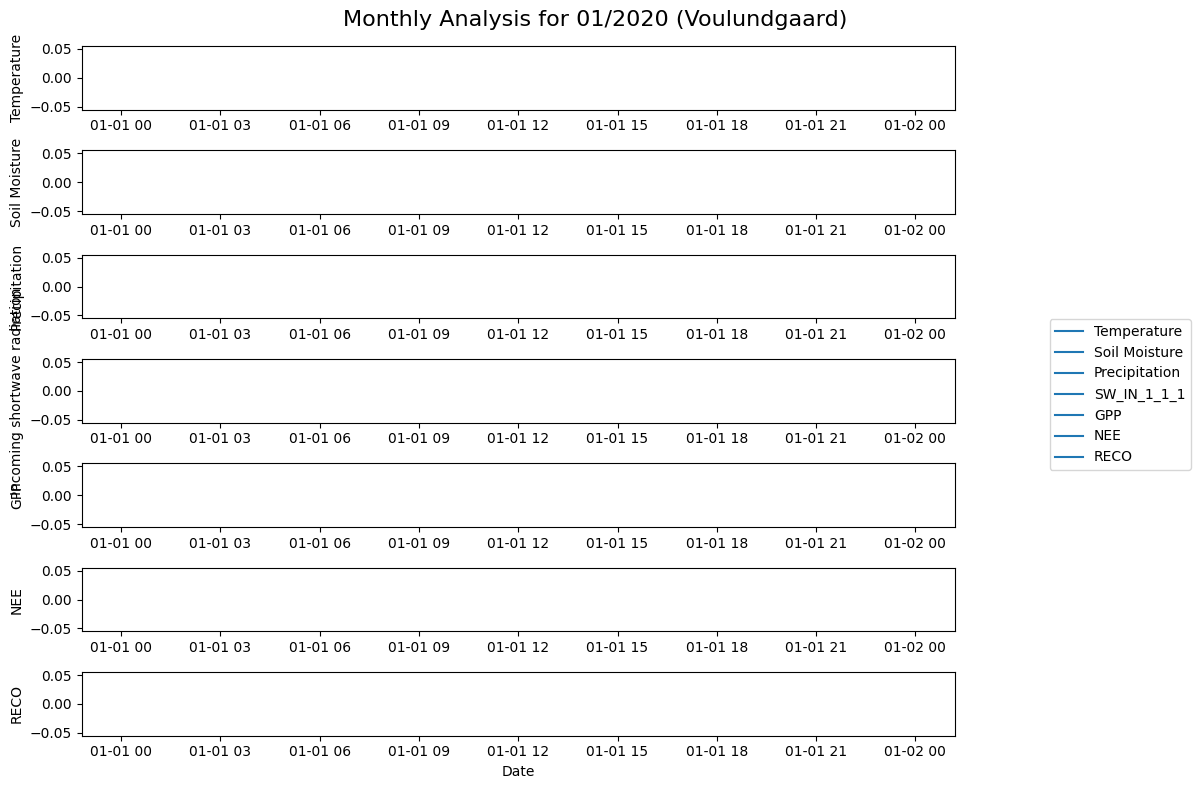

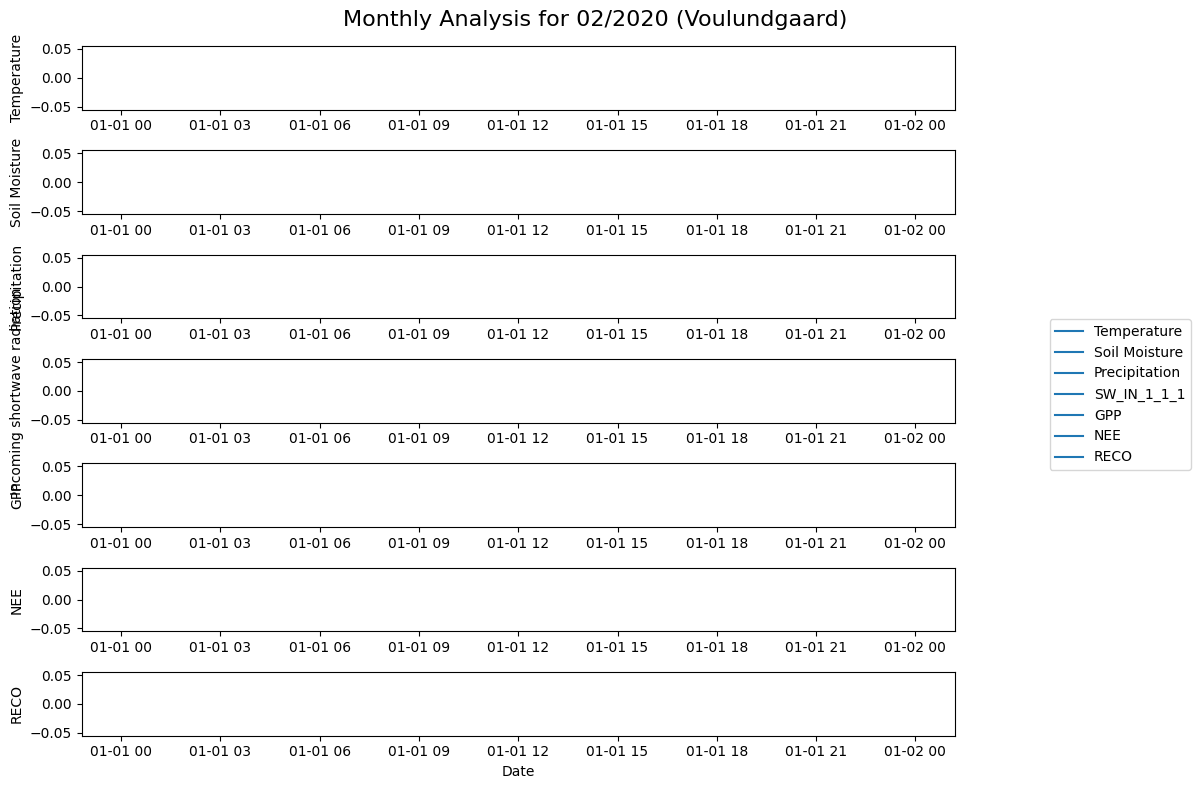

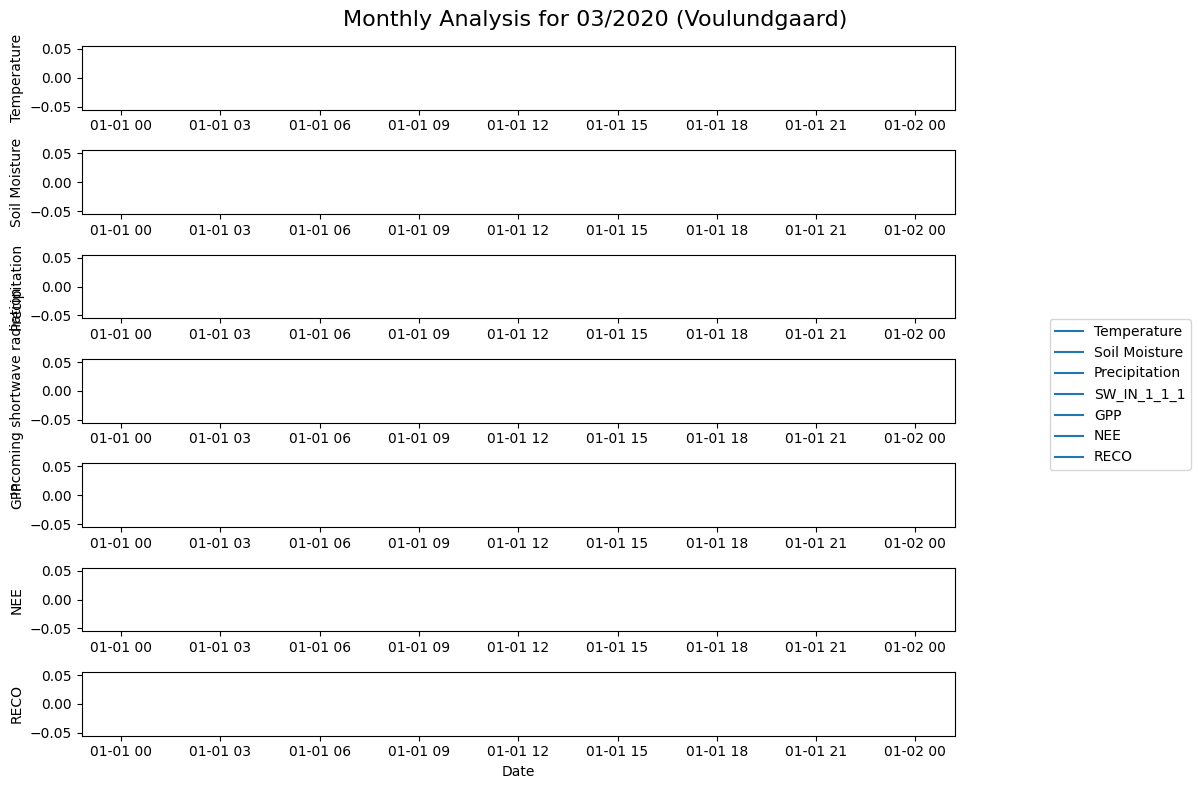

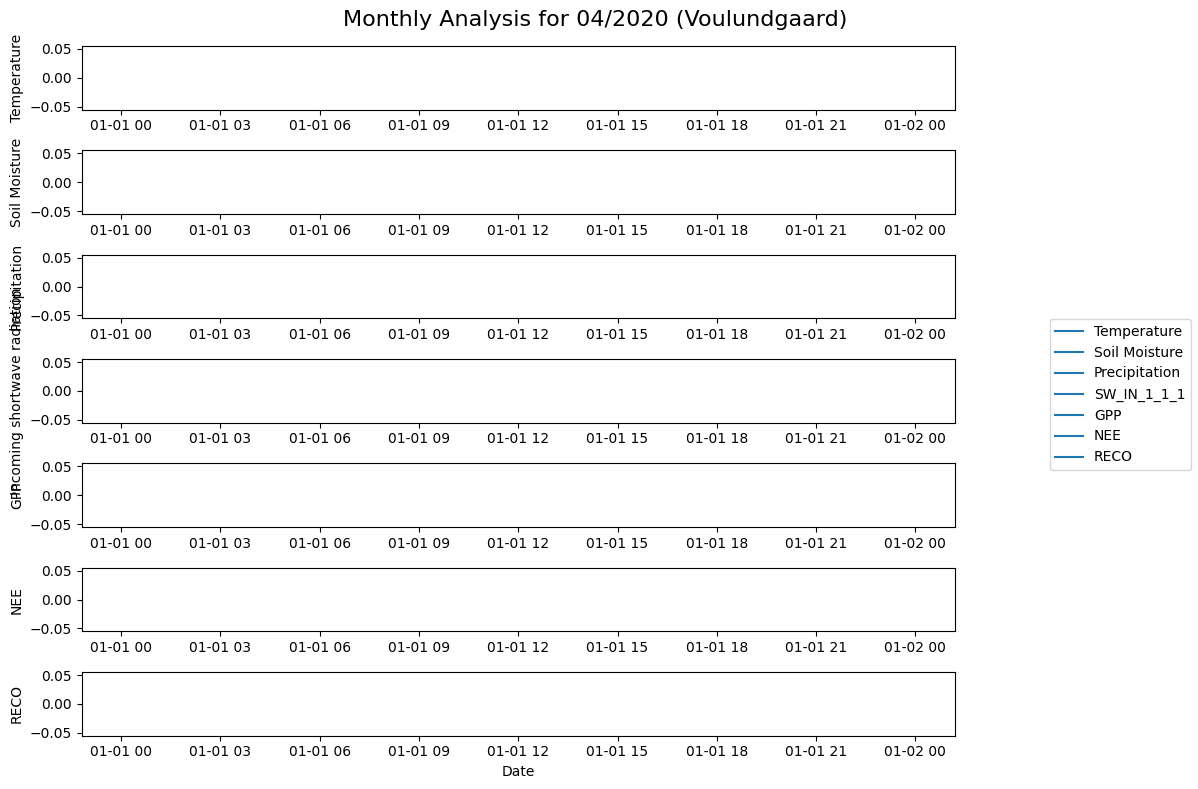

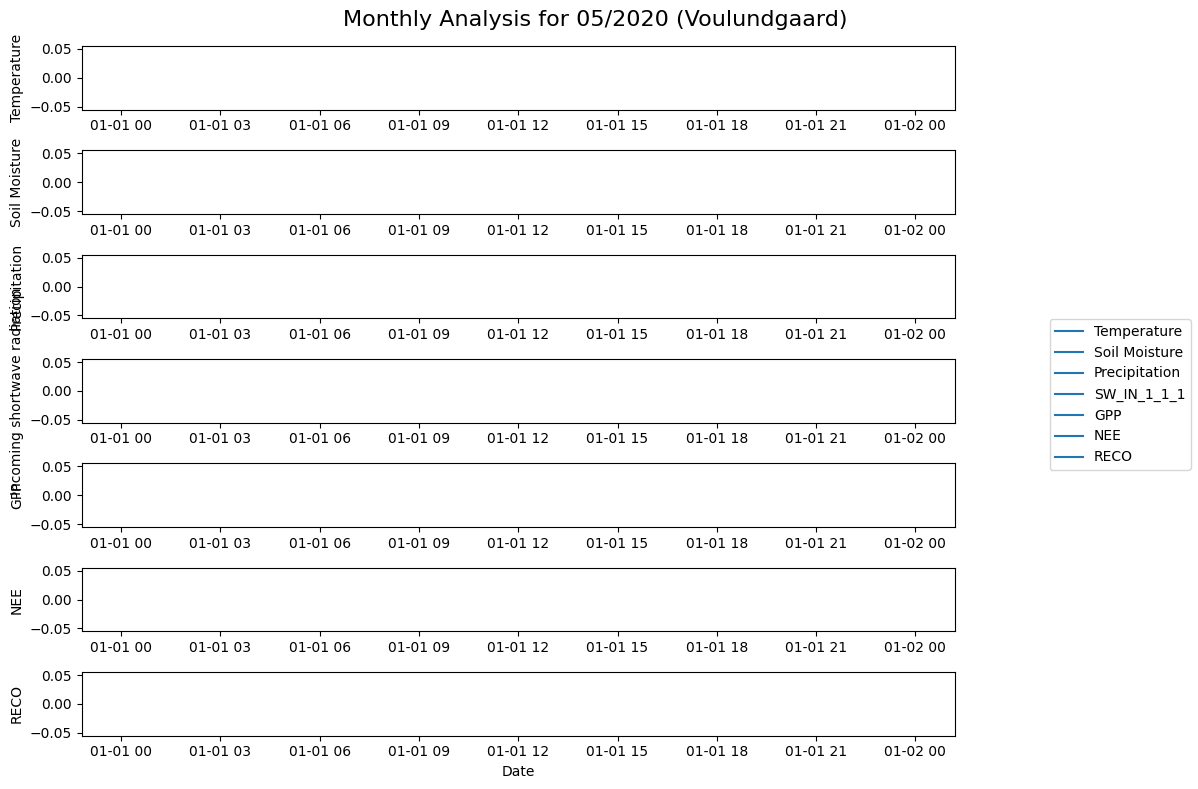

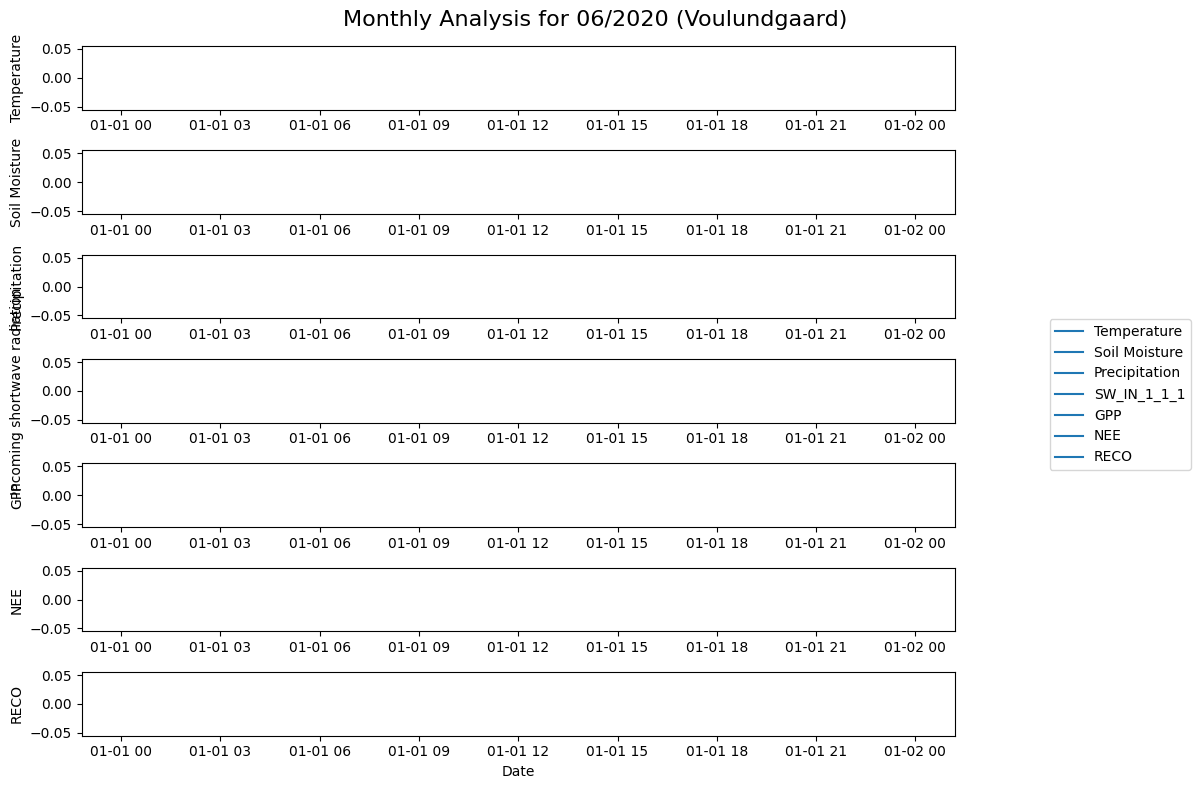

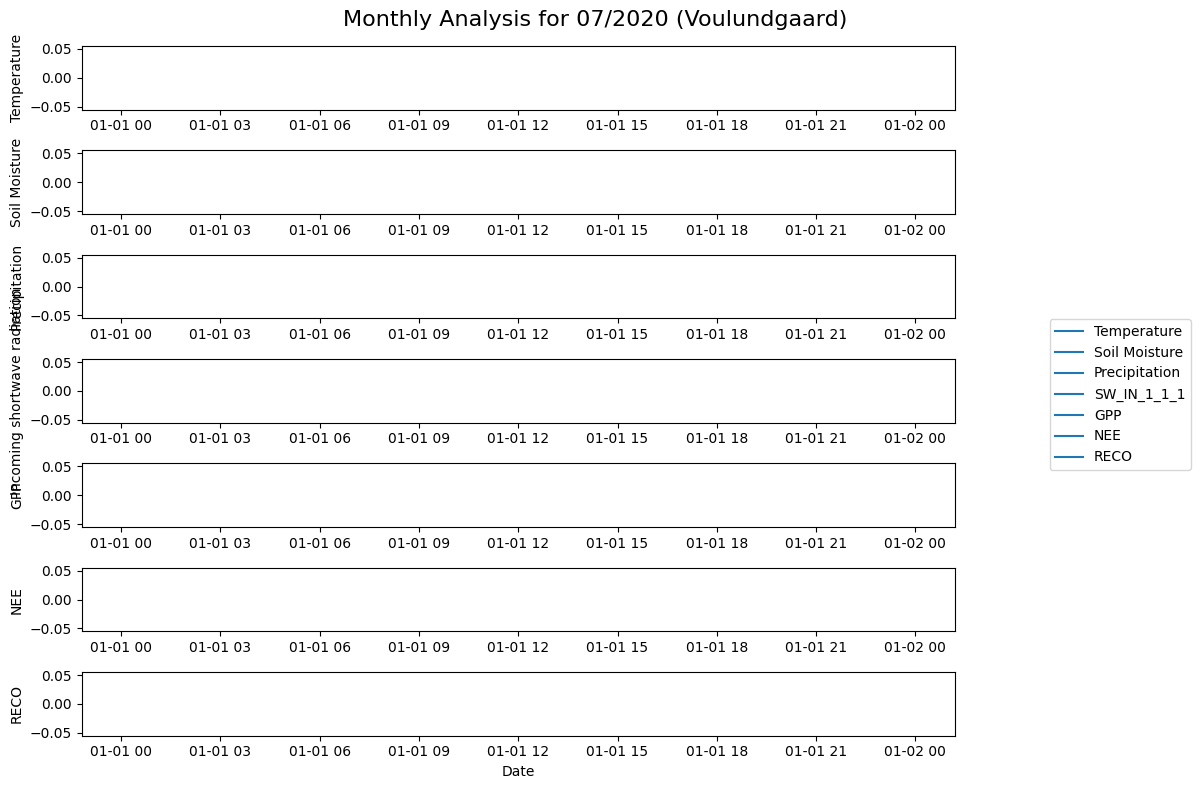

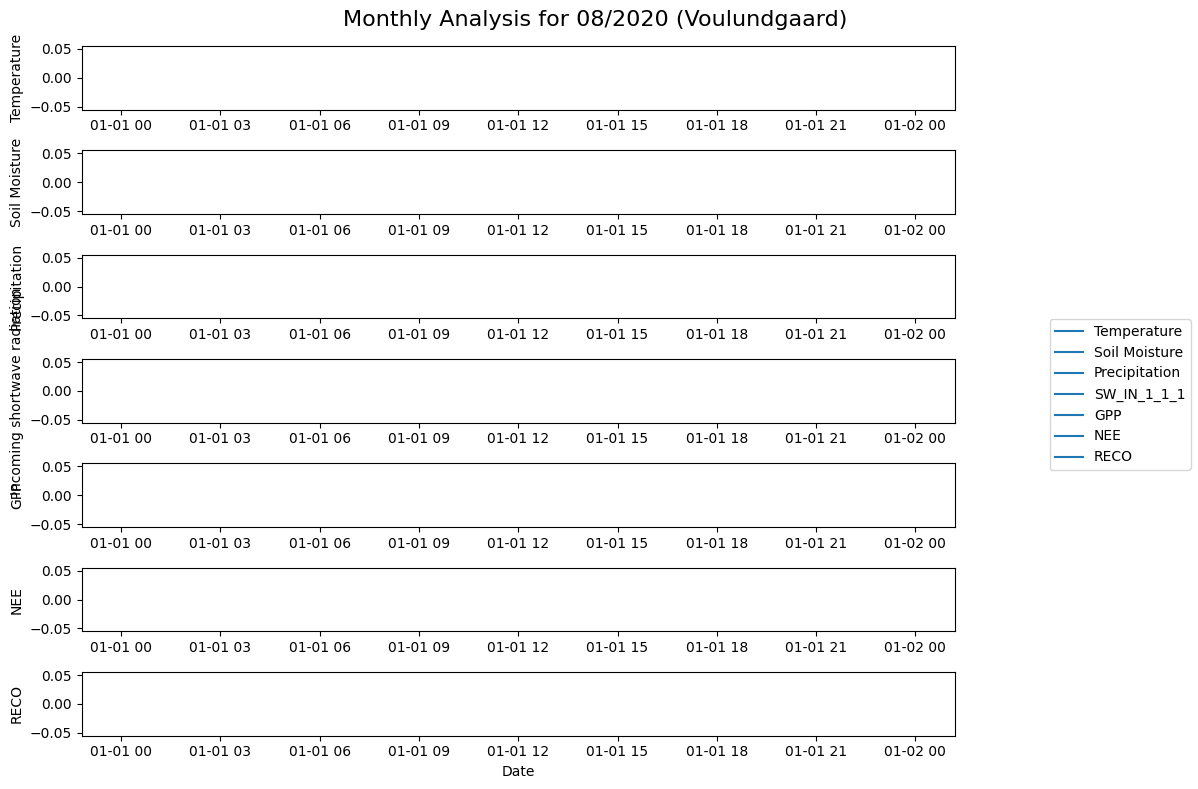

KeyboardInterrupt: 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel("data/vou_data.xlsx")

# Convert the TIMESTAMP_START column to a datetime format
df["TIMESTAMP_START"] = pd.to_datetime(df["TIMESTAMP_START"], format="%Y%m%d%H%M")

# Extract year and month from the TIMESTAMP_START column
df["Year"] = df["TIMESTAMP_START"].dt.year
df["Month"] = df["TIMESTAMP_START"].dt.month

# List of variables to plot
variables = ["GPP_DT_VUT_REF", "NEE_VUT_REF", "RECO_DT_VUT_REF", "SW_IN_1_1_1"]
variable_labels = ["GPP", "NEE", "RECO", "SW_IN"]

# Loop through each year and month
for year in df["Year"].unique():
    for month in df["Month"].unique():
        # Filter data for the specific year and month
        df_month = df[(df["Year"] == year) & (df["Month"] == month)]

        # Remove -9999 values from SW_IN_1_1_1 and Soil Moisture
        df_month = df_month[df_month["SW_IN_1_1_1"] != -9999]
        df_month = df_month[df_month["SWC_F_MDS_1"] != -9999]

        # Create a figure for GPP, NEE, Reco, Temperature, Soil Moisture, Precipitation, and SW_IN_1_1_1
        fig, axs = plt.subplots(len(variables) + 3, 1, figsize=(12, 8))

        plt.suptitle(f"Monthly Analysis for {month:02d}/{year} (Voulundgaard)", fontsize=16)

        # Plot Temperature
        axs[0].plot(df_month["TIMESTAMP_START"], df_month["TA_F"], label="Temperature")
        axs[0].set_ylabel("Temperature")

        # Plot Soil Moisture
        axs[1].plot(df_month["TIMESTAMP_START"], df_month["SWC_F_MDS_1"], label="Soil Moisture")
        axs[1].set_ylabel("Soil Moisture")

        # Plot Precipitation
        axs[2].plot(df_month["TIMESTAMP_START"], df_month["P_F"], label="Precipitation")
        axs[2].set_ylabel("Precipitation")

        # Plot SW_IN_1_1_1
        axs[3].plot(df_month["TIMESTAMP_START"], df_month["SW_IN_1_1_1"], label="SW_IN_1_1_1")
        axs[3].set_ylabel("Incoming shortwave radiation")

        for i, variable in enumerate(variables[0:3]):  # Exclude SW_IN_1_1_1 from the loop
            # Plot Variables GPP, NEE, RECO
            axs[i + 4].plot(df_month["TIMESTAMP_START"], df_month[variable], label=variable_labels[i])
            axs[i + 4].set_ylabel(variable_labels[i])

        # Mark events for the specific year and month
        events = [
            ("Fertilizer", "202103070000", "black"),
            ("Fertilizer", "202104120000", "black"),
            ("Fertilizer", "202105100000", "black"),
            ("Pesticide", "202105100000", "red"),
            ("Irrigation", "202106130000", "blue"),
            ("Pesticide", "202106150000", "red"),
            ("Irrigation", "202106250000", "blue"),
            ("Irrigation", "202107160000", "blue"),
            ("Irrigation", "202107220000", "blue"),
            ("Harvest", "202108140000", "gold"),
            ("Sowing", "202108180000", "cyan"),
            ("Pesticide", "202111150000", "red")
        ]

        events_2022 = [
            ("Fertilizer", "202203220000", "black"),
            ("Fertilizer", "202203240000", "black"),
            ("Pesticide", "202205080000", "red"),
            ("Pesticide", "202205160000", "red"),
            ("Harrowing", "202203150000", "purple"),
            ("Harrowing", "202203252330", "purple"),
            ("Harrowing", "202203260000", "purple"),
            ("Sowing", "202204090000", "cyan"),
            ("Harvest", "202208120000", "gold")
        ]

        legend_handles = []
        legend_labels = []

        for ax in axs:
            # Add Variable labels to the legend
            legend_handles.extend(ax.get_lines())
            legend_labels.extend([line.get_label() for line in ax.get_lines()])

            # Add Management Action labels to the legend and mark events on the figure
            for event, date, color in events:
                event_date = pd.to_datetime(date, format="%Y%m%d%H%M")
                if event_date.year == year and event_date.month == month:
                    ax.axvline(x=event_date, color=color, linestyle='--')
                    if event not in legend_labels:
                        legend_handles.append(plt.Line2D([0], [0], color=color, linestyle='--'))
                        legend_labels.append(event)

            for event, date, color in events_2022:
                event_date = pd.to_datetime(date, format="%Y%m%d%H%M")
                if event_date.year == year and event_date.month == month:
                    ax.axvline(x=event_date, color=color, linestyle='--')
                    if event not in legend_labels:
                        legend_handles.append(plt.Line2D([0], [0], color=color, linestyle='--'))
                        legend_labels.append(event)

        axs[-1].set_xlabel("Date")
        fig.legend(handles=legend_handles, labels=legend_labels, loc="center right")
        plt.tight_layout(rect=[0, 0, 0.9, 1])
        plt.subplots_adjust(right=0.8)

        # Show the figure
        plt.show()